In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

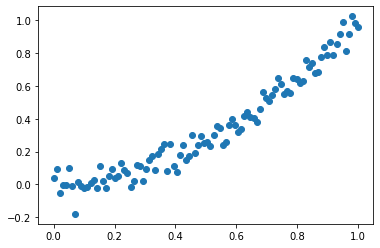

In [2]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return x**2

x, y = create_toy_data(func, 100, 0.05)

plt.scatter(x, y)
plt.show()

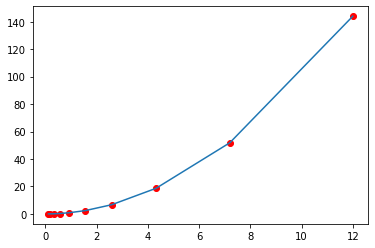

In [ ]:
def xy(x):
  x1 = []
  y = []
  for i in range(10):
    x = x - 0.2*2*x
    x1.append(x)
    y.append(x**2)
  return x1, y

x1,y = xy(20)
# x = np.array(20)
plt.plot(x1, np.power(x1, 2))
plt.scatter(x1, y, color = 'red')
plt.show()

#EX1
Tự biến đổi lại thuật toán logistic regression, từ xây dựng công thức, likelihood, maximize likelihood, đạo làm negative log likelihood theo ma trận hệ số.

$\sigma(z) = \frac{1}{1 + e^{-z}}$

$$\sigma'(z) = \frac{e^{-z}}{(1 + e^{-z})^2} = \frac{1}{1 + e^{-z}} \frac{e^{-z}}{1 + e^{-z}} =\sigma(z) (1- \sigma(z)) $$


Likelihood function
$$p(t \mid w) = \prod_{i=1}^{N} y_n^{t_n} (1-y_n)^{1- t_n} \tag{maximize}$$

=> minimize   A =  $-ln(p(t \mid w))$

=>  $$-ln\ p(t \mid w) = - \sum_{i=1}^{N}\ \big( t_i ln\ y_i + (1- t_i)ln(1-y_i) \big) \tag{binary cross entropy}$$
=> $$Loss = -(t ln \ y + (1-t)ln(1-y))$$
$y = \sigma(z) \ \ \ z = w_0 +w_1 x_1+ w_2 x_2 $

$$\frac{dL}{dw_1} = \frac{dL}{dy} \frac{dy}{dz} \frac{dz}{dw_1}$$

$\frac{dL}{dy} = \frac{d(-t ln \ y - (1-t)ln(1-y))}{dy} = -\frac{t-y}{y(1-y)}$

$\frac{dy}{dz} = \frac{\sigma(z)}{\sigma(z)} = \sigma(z) (1- \sigma(z)) = y (1-y)$

$\frac{dz}{d w_1} = \frac{d(w_0+w_1x_1+w_2x_2)}{d w_1} = x_1$

=> $$\frac{dL}{dw_1} = x_1(y-t)$$

$$\frac{dL}{dw_0} = (y - t)$$

=> $$\frac{dL}{dW} = \begin{bmatrix} \frac{dL}{dw_0} \\
 \frac{dL}{dw_1} \\ . . . \\ \frac{dL}{dw_D}\end{bmatrix} = 
 \begin{bmatrix} y-t \\ (y-t) \theta_1 \\ ... \\ (y-t)\theta_D \end{bmatrix} \tag{ $\theta_n = \theta (x_n)$}$$

 => $$\nabla L = \sum_{i=1}^{N}(y_n - t_n) \theta_n = X^T (Y - T)$$

#EX2
Tìm hàm f(x), biết f'(x) = f(x)(1-f(x))
https://machinelearningcoban.com/2017/01/27/logisticregression/?fbclid=IwAR1ukaoKF9xThy-9dLX3uCJl9igZUbhMQA0DFzknWw2ISdVcxKVL10-ZL80#toi-uu-ham-mat-mat

Đối với mỗi điểm dữ liệu thứ $i$:
$$\dfrac {\partial L} {\partial w_0} =\sum_{i=1}^n \dfrac {\partial L} {\partial \hat y_i} \dfrac {\partial \hat y_i} {\partial w_0} =\sum_{i=1}^n \dfrac {\partial L} {\partial \hat y_i}\left( \dfrac{d\hat y_i}{d\hat z_i} \dfrac{\partial \hat z_i} {\partial w_0} \right)
\\
=\sum_{i=1}^n \left[-\frac 1 n \left(\frac {y_i} {\hat y_i} - \frac {1 - y_i} {1 - \hat y_i}\right)\right]\left[\dfrac{d\hat y_i}{d\ \theta_i}\right]
= \frac 1 n \sum_{i=1}^n \dfrac {\hat{y_i} - y_i}{\hat{y_i}(1-\hat{y_i})}\left[\dfrac{d\hat y_i}{d\ \theta_i}\right]$$

Để cho đạo hàm của loss function đẹp, ta muốn tìm hàm $\hat {y_i}$ sao cho 
$$\dfrac{d\hat y_i}{d\ w_0}= \hat{y_i}(1-\hat{y_i}) $$ (để triệt tiêu mẫu số)

Biến đổi tương đương biểu thức trên (với $\hat {y_i} \neq 0, 1$) sau đó tích phân 2 vế ta có
$$\dfrac{d\hat y_i}{\hat{y_i}(1-\hat{y_i})}= d\ {\theta_i}$$
$$\Rightarrow \int \dfrac{d\hat y_i}{\hat{y_i}(1-\hat{y_i})}= \int d\ {\theta_i}$$
$$\Rightarrow \int \left(\dfrac{1}{\hat{y_i}} + \dfrac{1}{1 -\hat{y_i}}\right)d\hat{y_i}= \ {\theta_i} + C$$
$$\Rightarrow \ln \left|{\hat {y_i}}\right| - \ln \left|{1 -\hat {y_i}}\right| = \ {\theta_i} + C$$
$$\Rightarrow \ln \left|\dfrac {\hat {y_i}} {1 -\hat {y_i}}\right| = \ {\theta_i} + C$$
Đến đây ta tìm hàm $\hat {y_i}$ theo $\ {\theta_i}$:

$$\dfrac {\hat {y_i}} {1 -\hat {y_i}} = \alpha e^{\ {\theta_i}} \Leftrightarrow 
\dfrac 1 {1 - \hat {y_i}} = 1 + \alpha e^{\ {\theta_i}}$$ (Cộng cả hai vế với 1)
$$\Leftrightarrow 1 - \hat{y_i} = \dfrac 1 {1 + \alpha e^{\ {\theta_i}}}$$
$$\Leftrightarrow \hat{y_i} = \dfrac {\alpha e^{\ {\theta_i}}} {1 + \alpha e^{\ {\theta_i}}} = \dfrac 1 {1 + \alpha e^{-\hat {\theta_i}}}$$
Khi $ \alpha = 1$ ta có hàm sigmoid như đã sử dụng trong bài toán trên

#EX3
Dùng thuật toán gradient descent tối ưu hàm f(x) = $x^2$, với giá trị khởi tạo x = 2 và thử các learning rate khác nhau (0.2, 1, 2), vẽ đồ thị hàm loss để hiện sự thay đổi hàm f(x) sau các bước update.

In [64]:
def grad(x_, learning_rate):
  x = []
  y = []
  for i in range(1000):
    x.append(x_)
    y.append(x_**2)
    x_ = x_ - learning_rate*2*x_
  return x, y

def plot_func():
  x = np.linspace(-2,2,100)
  y = x** 2
  plt.plot(x, y)


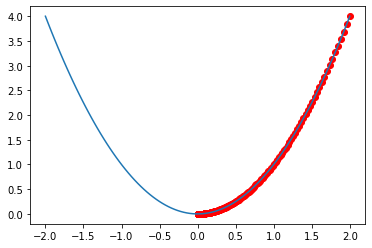

In [62]:
x1,y = grad(2, 0.01)
# x = np.array(20)
plot_func()
plt.scatter(x1, y, color = 'red')
plt.show()

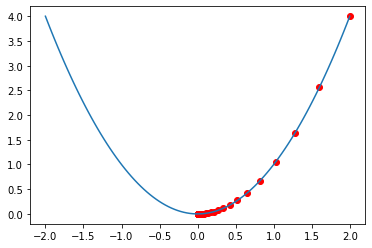

In [63]:
x1,y = grad(2, 0.1)
# x = np.array(20)
plot_func()
plt.scatter(x1, y, color = 'red')
plt.show()

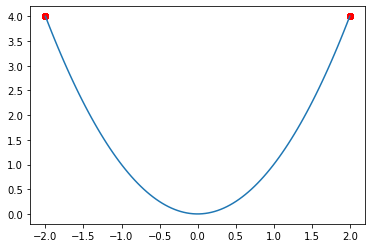

In [65]:
x1,y = grad(2, 1)
plot_func()
plt.scatter(x1, y, color = 'red')
plt.show()

#EX4
Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không với dữ liệu ở đây (https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv), input là lương, thời gian làm việc, output là cho vay hay không.
1. xây dựng model, tìm tham số.
2. dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [98]:
#1,
df = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
df.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [99]:
df = df.values

In [100]:
df.shape

(20, 3)

In [101]:
x = df[:, 0:df.shape[1]-1].reshape(-1, df.shape[1]-1)
y = df[:, df.shape[1]-1].reshape(-1, 1)

In [102]:
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

Text(0, 0.5, 'kinh nghiệm (năm)')

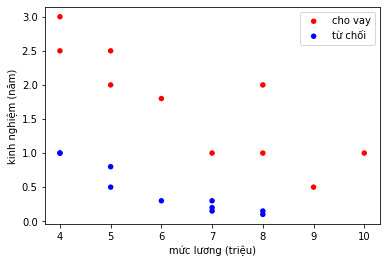

In [103]:
plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [104]:
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((df.shape[0], 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

In [105]:
x.shape

(20, 3)

In [106]:
x

array([[ 1.  , 10.  ,  1.  ],
       [ 1.  ,  5.  ,  2.  ],
       [ 1.  ,  6.  ,  1.8 ],
       [ 1.  ,  7.  ,  1.  ],
       [ 1.  ,  8.  ,  2.  ],
       [ 1.  ,  9.  ,  0.5 ],
       [ 1.  ,  4.  ,  3.  ],
       [ 1.  ,  5.  ,  2.5 ],
       [ 1.  ,  8.  ,  1.  ],
       [ 1.  ,  4.  ,  2.5 ],
       [ 1.  ,  8.  ,  0.1 ],
       [ 1.  ,  7.  ,  0.15],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.8 ],
       [ 1.  ,  7.  ,  0.3 ],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.5 ],
       [ 1.  ,  6.  ,  0.3 ],
       [ 1.  ,  7.  ,  0.2 ],
       [ 1.  ,  8.  ,  0.15]])

In [107]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [108]:
# numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
# learning_rate = 0.01

def cal_cost(numOfIteration, learning_rate):
  w = np.array([0.,0.1,0.1]).reshape(-1,1)
  for i in range(1, numOfIteration):
    y_predict = sigmoid(np.dot(x,w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
      # Gradient descent
      # np.dot: nhan ma tran, * / multiply : element-wise
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
    # cost_hist.append(cost[i])
  return w, cost

In [109]:
w, cost = cal_cost(1000, 0.01)
print(w)

[[-7.25683504]
 [ 0.62975152]
 [ 3.6436906 ]]


In [126]:
def predict(x_, w):
  a = sigmoid(np.dot(x_, w))
  return np.where(a>= 0.5, 1, 0)


In [116]:
x_test = pd.DataFrame(data=np.array([[1, 2, 3], [1, 1, 8], [1, 5, 5]]))
x_test

,0,1,2
0,1,2,3
1,1,1,8
2,1,5,5


In [127]:
prediction = predict(x_test, w)
prediction

array([[1],
       [1],
       [1]])